### Tractography Clustering with QuickBundles

QuickBundles ([Garyfallidis et al. 2012](http://journal.frontiersin.org/article/10.3389/fnins.2012.00175/abstract)) is a powerful algorithm for simplifying and clustering collections of streamlines

We'll show here how to use this to cluster a small bundle: the fornix

In [1]:
import numpy as np
from dipy.data import get_data
from nibabel import trackvis as tv

fname = get_data('fornix')
streams, hdr = tv.read(fname)
streamlines = [i[0] for i in streams]

In [2]:
from dipy.viz import fvtk
ren = fvtk.ren()
ren.SetBackground(1, 1, 1)
fvtk.add(ren, fvtk.streamtube(streamlines, fvtk.colors.white))
fvtk.record(ren, n_frames=1, out_path='fornix_initial.png', size=(600, 600))

# On your local machine, you can view this interactively:
# fvtk.show(ren)


In [8]:
from IPython.display import display, Image

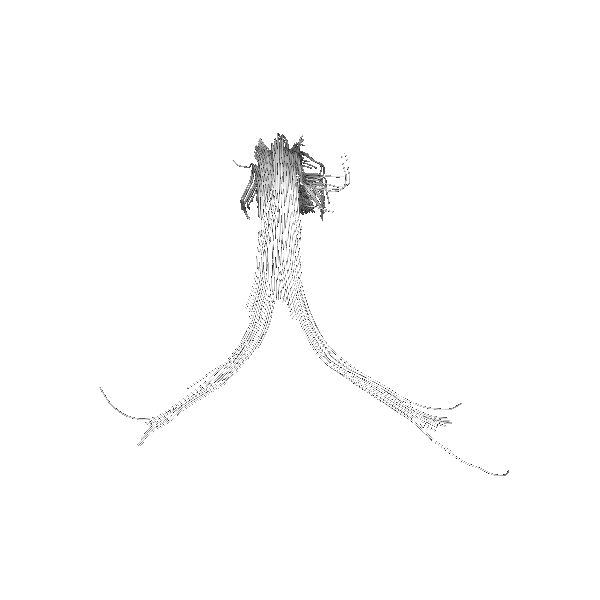

In [9]:
display(Image('fornix_initial.png'))

Per default, QuickBundles uses a distance metric called 'MDF' (minimum-direct-flipped) as a distance metric between streamlines, and a 10mm distance threshold. 

The MDF metric requires streamlines to have the same number of points, so the clustering algorithm will internally 
use a representation of streamlines that have been automatically downsampled/upsampled so they have only 12 points (This can also be set manually).

In [3]:
from dipy.segment.clustering import QuickBundles

qb = QuickBundles(threshold=10.)
clusters = qb.cluster(streamlines)

`clusters` is a `ClusterMap` object which contains attributes that
provide information about the clustering result.

In [4]:
print("Number of clusters:", len(clusters))
print("Cluster sizes:", map(len, clusters))
print("Small clusters:", clusters < 10)
print("Streamlines indices of the first cluster:\n", clusters[0].indices)
print("Centroid of the last cluster:\n", clusters[-1].centroid)

Number of clusters: 4
Cluster sizes: <map object at 0x7f6c669b97b8>
Small clusters: [False False False  True]
Streamlines indices of the first cluster:
 [0, 7, 8, 10, 11, 12, 13, 14, 15, 18, 26, 30, 33, 35, 41, 65, 66, 85, 100, 101, 105, 115, 116, 119, 122, 123, 124, 125, 126, 128, 129, 135, 139, 142, 143, 144, 148, 151, 159, 167, 175, 180, 181, 185, 200, 208, 210, 224, 237, 246, 249, 251, 256, 267, 270, 280, 284, 293, 296, 297, 299]
Centroid of the last cluster:
 [[  84.83773804  117.92590332   77.32278442]
 [  86.10850525  115.84362793   81.91885376]
 [  86.40357208  112.25676727   85.72930145]
 [  86.48336792  107.60327911   88.13782501]
 [  86.23897552  102.5100708    89.29447174]
 [  85.04563904   97.46020508   88.54240417]
 [  82.60240173   93.14851379   86.84208679]
 [  78.98937225   89.57682037   85.63652039]
 [  74.72344208   86.60827637   84.9391861 ]
 [  70.40846252   85.15874481   82.4484024 ]
 [  66.74534607   86.00262451   78.82582092]
 [  64.02451324   88.43942261   75.0

Let's visualize this. First, the centroids:

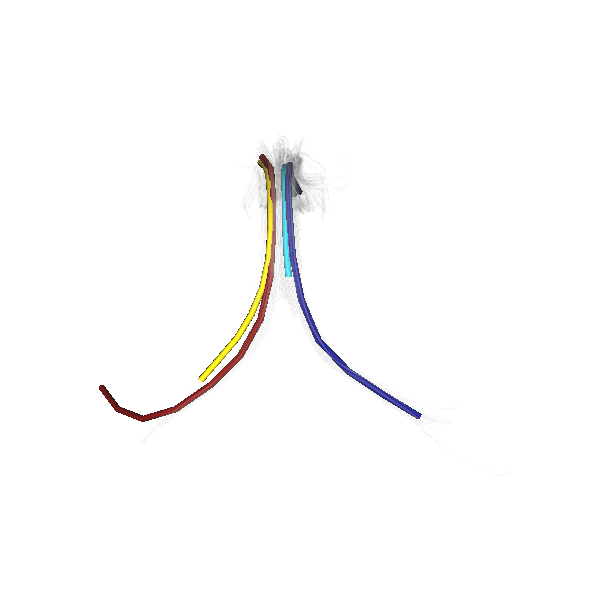

In [11]:
colormap = fvtk.create_colormap(np.arange(len(clusters)))
fvtk.clear(ren)
ren.SetBackground(1, 1, 1)
fvtk.add(ren, fvtk.streamtube(streamlines, fvtk.colors.white, opacity=0.05))
fvtk.add(ren, fvtk.streamtube(clusters.centroids, colormap, linewidth=0.4))
fvtk.record(ren, n_frames=1, out_path='fornix_centroids.png', size=(600, 600))
# On your local machine, you can view this interactively:
# fvtk.show(ren)

display(Image('fornix_centroids.png'))

Next, the centroid assignment of the entire set:

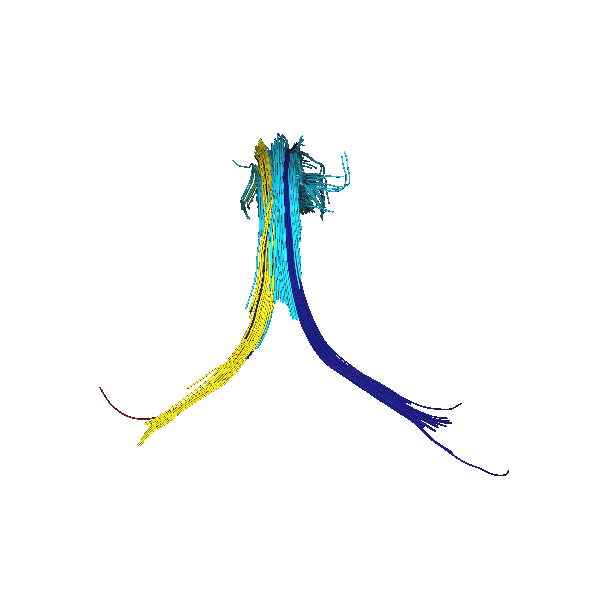

In [12]:
colormap_full = np.ones((len(streamlines), 3))
for cluster, color in zip(clusters, colormap):
    colormap_full[cluster.indices] = color

fvtk.clear(ren)
ren.SetBackground(1, 1, 1)
fvtk.add(ren, fvtk.streamtube(streamlines, colormap_full))
fvtk.record(ren, n_frames=1, out_path='fornix_clusters.png', size=(600, 600))
# On your local machine, you can view this interactively:
# fvtk.show(ren)
display(Image('fornix_clusters.png'))

You can save the cluster map into a Python file format called a 'pickle'. This is useful for storing cluster maps for later use:

In [7]:
from dipy.io.pickles import save_pickle, load_pickle
save_pickle('QB.pkl', clusters)

### Exercise: Load the tracks from the previous notebook and cluster them using QuickBundles